# 导入模块

In [ ]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [14]:
print("matplotlib style available:\n\n{}".format(plt.style.available))

matplotlib style available:

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [15]:
mpl.style.use(['bmh'])
print(f"Using style of '{plt.style.available[2]}' to plot")

Using style of 'bmh' to plot


In [16]:
import seaborn as sns

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# 对鸢尾花数据集进行EDA：

In [19]:
df_iris = sns.load_dataset('iris')

In [20]:
df_iris.shape

(150, 5)

In [21]:
df_iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
62,6.0,2.2,4.0,1.0,versicolor
70,5.9,3.2,4.8,1.8,versicolor
15,5.7,4.4,1.5,0.4,setosa


In [23]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
df_iris.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


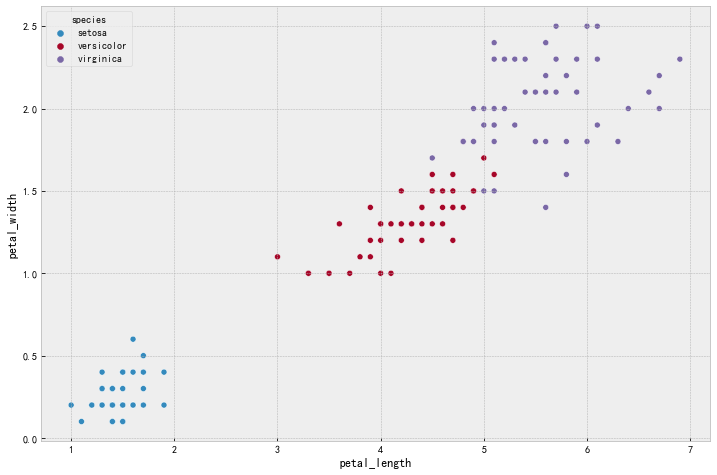

In [29]:
sns.scatterplot(x = 'petal_length', 
                y = 'petal_width', 
                hue = 'species',
                data = df_iris,
               )
plt.show()

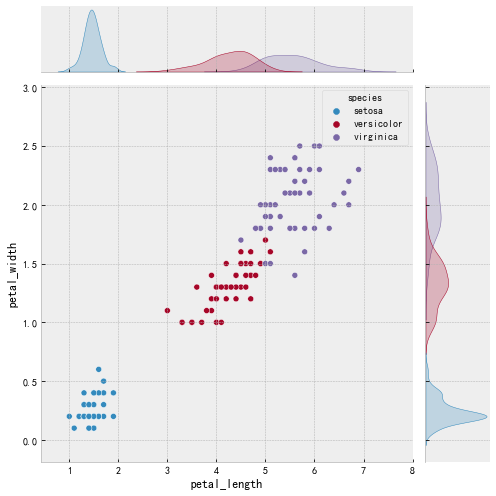

In [30]:
sns.jointplot(x = 'petal_length', 
              y = 'petal_width', 
              data = df_iris,
              hue = 'species',
              height = 7)

plt.show()

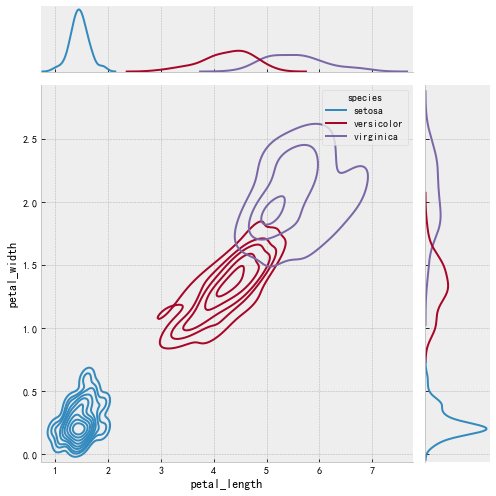

In [31]:
sns.jointplot(x = 'petal_length', 
                y = 'petal_width', 
                data = df_iris,
                hue = 'species',
                height = 7,
                kind = 'kde')

plt.show()

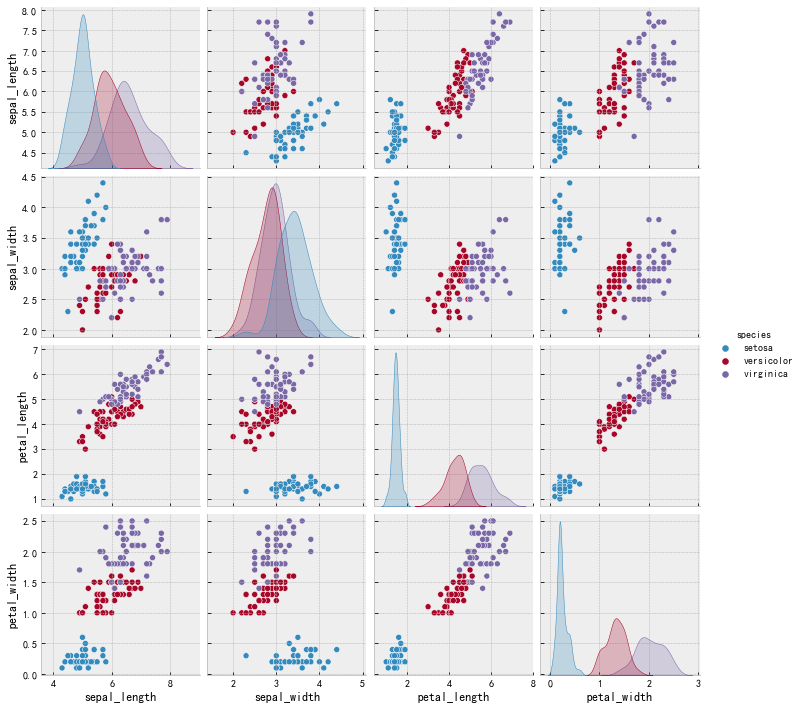

In [39]:
sns.pairplot(data = df_iris,
             hue = 'species',)

plt.show()

# 建模：

In [2]:
X, y = load_iris(return_X_y=True)

In [41]:
len(X), len(y)

(150, 150)

In [58]:
X[:3], y[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([0, 0, 0]))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
len(X_train), len(y_train), len(X_test), len(y_test)

(120, 120, 30, 30)

In [46]:
gnb = GaussianNB()

In [47]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [65]:
print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {np.sum(y_test != y_pred)})")

Number of mislabeled points out of a total 30 points : 1)


In [49]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) 

0.9666666666666667

In [50]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.9761904761904763, 0.9444444444444445, 0.957351290684624, None)

In [55]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred, labels = [0, 1, 2])
print(conf_mat)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
